With 1 skill : 
Generation: 1	Fitness: 188318.19928036476	Population: 207
Generation: 2	Fitness: 148973.20113786415	Population: 226
Generation: 3	Fitness: 148973.20113786415	Population: 265
Generation: 4	Fitness: 30368.274296464908	Population: 339
Generation: 5	Fitness: 30368.274296464908	Population: 358
Generation: 6	Fitness: 30368.274296464908	Population: 384
Generation: 7	Fitness: 30368.274296464908	Population: 391
Generation: 8	Fitness: 30368.274296464908	Population: 395
['tanphatls987', 125706.7405] 

['flashmt', 81797.33214] 

['Akikaze', 95588.21905] 



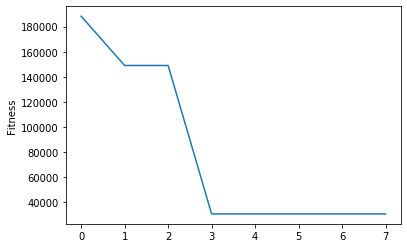

Excution time: 0:00:00.056879s


With 2 skill : 
Generation: 1	Fitness: 268309.1685664416	Population: 205
Generation: 2	Fitness: 227460.74026795157	Population: 217
Generation: 3	Fitness: 151046.58092965133	Population: 247
Generation: 4	Fitness: 104420.12228297151	Population: 311
Generation: 5	Fitness: 31160.048639218217	Population: 352
Generation: 6	Fitness: 31160.048639218217	Population: 375
Generation: 7	Fitness: 31160.048639218217	Population: 383
Generation: 8	Fitness: 31160.048639218217	Population: 395
Generation: 9	Fitness: 31160.048639218217	Population: 395
['Akikaze', 95588.21905, 152897.219] 

['I_love_tigersugar', 89816.10909, 104953.6857] 

['tanphatls987', 125706.7405, 108050.1643] 



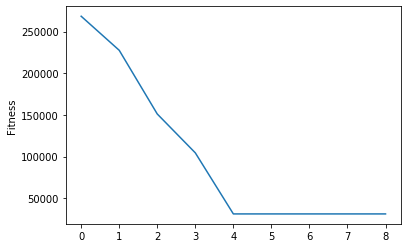

Excution time: 0:00:00.064828s


With 3 skill : 
Generation: 1	Fitness: 238206.91409666152	Population: 207
Generation: 2	Fitness: 188459.32728660724	Population: 223
Generation: 3	Fitness: 169588.6903121346	Population: 256
Generation: 4	Fitness: 100179.67804224922	Population: 330
Generation: 5	Fitness: 31160.048639218217	Population: 359
Generation: 6	Fitness: 31160.048639218217	Population: 387
Generation: 7	Fitness: 31160.048639218217	Population: 392
Generation: 8	Fitness: 31160.048639218217	Population: 396
Generation: 9	Fitness: 30368.274296464908	Population: 392
Generation: 10	Fitness: 30368.274296464908	Population: 395
Generation: 11	Fitness: 30368.274296464908	Population: 399
Generation: 12	Fitness: 30368.274296464908	Population: 393
Generation: 13	Fitness: 30368.274296464908	Population: 397
['tanphatls987', 125706.7405, 108050.1643, 9688.733333] 

['Akikaze', 95588.21905, 152897.219, 14612.28333] 

['flashmt', 81797.33214, 106837.8238, 13434.43333] 



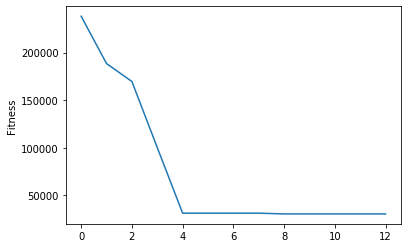

Excution time: 0:00:00.090126s




In [25]:
import numpy as np
import csv
import heapq
import random
import math
import matplotlib.pyplot as plt
import atexit
from time import time, strftime, localtime
from datetime import timedelta

def secondsToStr(elapsed=None):
    if elapsed is None:
        return strftime("%S", localtime())
    else:
        return str(timedelta(seconds=elapsed))

def log(s, elapsed=None):
    line = "="*40
    if elapsed:
        print(elapsed)

def endlog(start):
    end = time()
    elapsed = end-start
    return secondsToStr(elapsed)


h_member = 3
generation_size = 5
list_fitness =[]
population_temp = []
Z = 0.4

## so skill chuyen vao
m_skill = 3

with open(r"C:\Users\DUONG\Desktop\data-selection\data.norm2.csv", "rt",encoding = 'unicode_escape') as f:
    reader = csv.reader((line.replace('\0','') for line in f))
    countt = 0
    for line in enumerate(reader):
        count=0
        check_mskill = 0
        candi = []
        for row in line[1]:
            if(countt == 0):
                candi.append(row)
                count = count + 1
            else:
                if(count < 3):
                    candi.append(row)
                else:
                    candi.append(float(row))
                count = count + 1
            check_mskill += 1
        countt += 1
        population_temp.append(candi)
    population_size = round((len(population_temp)-1)*0.8)
    m = m_skill
    
start = time()
atexit.register(endlog)
log("")

del population_temp[0]
for i in range(0,len(population_temp)):
    del population_temp[i][0]
    del population_temp[i][1]

class Individual(object):
    def __init__(self, candi): 
        self.candi = candi  
        self.fitness = self.cal_fitness() 

    def cal_fitness(self):
        fitness = 0
        for j in range(1,m+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            fitness = fitness + (list_score[j-1]-team_score)**2
        fitness = math.sqrt(fitness)
        return fitness
    
    def mate(self,partner):
        child = []
        for gp1, gp2 in zip(self.candi,partner.candi):
            sum_gp1 = sum(gp1[1:m+1])
            sum_gp2 = sum(gp2[1:m+1])
            bett = gp1 if sum_gp1 > sum_gp2 else gp2
            wors = gp2 if sum_gp1 > sum_gp2 else gp1
            prob = random.random()
            if prob < 0.60:
                if bett in child:
                    pass
                else:
                    child.append(bett)
            elif prob < 0.90:
                if wors in child:
                    pass
                else:
                    child.append(wors)
            else:
                tem = random.choice(population_temp[::])
                if tem in child:
                    pass
                else:
                    child.append(tem)
        while len(child) < 3:
            j = random.choice(population_temp[::])
            if j in child:
                pass
            else:
                child.append(j)
        return Individual(child)
    
    def check_minimumscore(self):
        for j in range(1,m+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            if Z*list_score[j-1] > team_score:
                return 0
            else:
                return 1
    def check_cost(self):
        for j in range(1,m+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            if 0.3*list_score[j-1] > team_score:
                return 0
            else:
                return 1

def GAs(m_skill):
    start = time()
    global population_size
    global generation_size
    list_fitness = []
    global h_member
    population = []
    candi = []

    for _ in range(0,population_size):
        for _ in range(h_member):
            while len(candi) < 3:
                j = random.choice(population_temp[::])
                if j in candi:
                    pass
                else:
                    candi.append(j)
        copy = candi.copy()
        population.append(Individual(copy))
        del candi[::]
        
    list_score = []
    score = []
    for j in range(1,m+1):
        for i in range(0,len(population_temp)-1):
            score.append(population_temp[i][j])
        top3 = sorted(zip(score), reverse=True)[:h_member]
        summ = 0
        for i in top3:
            summ = summ + i[0]
        list_score.append(summ)
        score = []
        
    loop_check = False
    generation = 1

    print("With {0} skill : ".format(m_skill))
    while True:
        population = sorted(population, key = lambda x:x.fitness,reverse=False)
        
        new_generation = []
        s = int((10*population_size)/100)
        new_generation.extend(population[:s])
        
        s = int((90*population_size)/100)
        for _ in range(s):
            parent1 = random.choice(population[:round(population_size*0.5)])
            parent2 = random.choice(population[:round(population_size*0.5)])
            child = parent1.mate(parent2)
            new_generation.append(child) 
  
        population = new_generation
        for p in population:
            if (p.check_minimumscore() !=1):
                population.remove(p)
                
        print("Generation: {0}\tFitness: {1}\tPopulation: {2}".
        format(generation,
        population[0].fitness,len(population)))
        list_fitness.append(round(population[0].fitness))
        
        if generation_size - generation < 0:
            fit_check = list_fitness[generation-1]
            j = 1
            for i in range(1,generation_size+1):
                if list_fitness[generation-i-1] == fit_check:
                    j = j + 1
            if j == 5:
                loop_check = True
        if loop_check == True:
            break
        generation += 1

    for i in range(h_member):
        print(population[0].candi[i][0:m_skill+1],"\n")
    return list_fitness,endlog(start)
def main():
    for i in range(1,m_skill+1):
        list_fitness,end = GAs(i)
        plt.plot(list_fitness)
        plt.ylabel('Fitness')
        plt.show()
        print("Excution time: {0}s\n\n".format(end))

if __name__ == '__main__':
    main()


In [48]:
#     population = []
#     candi = []

#     for _ in range(0,population_size):
#         for _ in range(h_member):
#             while len(candi) < 3:
#                 j = random.choice(population_temp[::])
#                 if j in candi:
#                     pass
#                 else:
#                     candi.append(j)
#         copy = candi.copy()
#         population.append(Individual(copy))
#         del candi[::]

In [ ]:
#     for _ in range(0,population_size-1):
#         if(limit <= len(population_temp)-3):
#             candi.append(population_temp[limit])
#             candi.append(population_temp[limit+1])
#             candi.append(population_temp[limit+2])
#             limit += 3
#         else:
#             while len(candi) < 3:
#                 j = random.choice(population_temp[::])
#                 if j in candi:
#                     pass
#                 else:
#                     candi.append(j)
#         copy = candi.copy()
#         population.append(Individual(copy))
#         del candi[::]